In [6]:
import logging
logging.root.setLevel(logging.INFO)


In [56]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [57]:
from utils.xcs_utils import *

In [7]:
exploration_cycles = 1000
exploitation_cycles = 500
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ A ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [59]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 99999999999999999999999999999999999# 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.wildcard_probability = 0.0

In [60]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=3,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment
Executing 1 experiment
Executing 2 experiment


In [61]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,19.666667,18.333333,18.333333
100,50.000000,200.000000,200.000000
200,37.666667,200.000000,200.000000
300,16.333333,200.000000,200.000000
400,47.000000,200.000000,200.000000
500,45.000000,200.000000,200.000000
600,14.333333,200.000000,200.000000
700,38.333333,200.000000,200.000000
800,35.000000,200.000000,200.000000


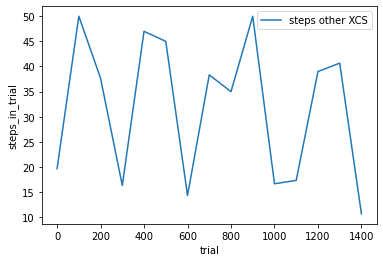

In [62]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

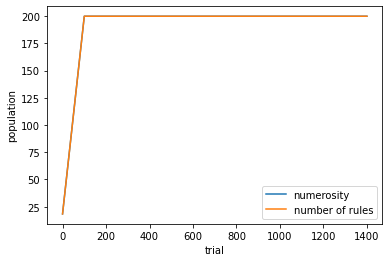

In [63]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [3]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    ga_threshold = 9999999999999999999999999,
                    metrics_trial_frequency=100,
                    mutation_chance=0.01,
                    user_metrics_collector_fcn=xcs_metrics)

In [8]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=3,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [5.753183395709529e-41, 2.159292778582813e-40, 1.253515642280712e-40, 2.5209629782634306e-40, 7.569508869886019e-41, 2.1873884048928495e-40, 1.6565574643280677e-40, 1.0842949299188363e-40], 'perf_time': 0.013000199999993356, 'population': 80, 'numerosity': 80}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 29, 'reward': [31.364722236947603, 115.30520592778899, 9.886847369331884, 5.45662672155003, 4.638095391004085, 3.4042051167905645, 5.294142650228229, 5.7713915871528], 'perf_time': 0.015804799999997954, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 17, 'reward': [194.2522502058606, 53.94857650381515, 98.73732628256941, 4.368861674886088, 7.243342732776246, 4.462264673335366, 4.9651884079276165, 6.027256527488662], 'perf_time': 0.008661399999994046, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 4, 'reward': [55.90099092140596, 9.347028821258352, 112.84972165016924, 8.526653060070778, 13.479242086186956, 8.738785085541329, 7.3312894571345035, 9.303370669253274], 'perf_time': 0.00219750000000829, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 27, 'reward': [151.6573397791832, 28.17872398602944, 10

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 8, 'reward': [50.62112069002153, 37.2796344090185, 332.3640542103291, 5.9946725851409814, 14.01427660976799, 6.1540185773130744, 7.664914993193679, 4.598023885727767], 'perf_time': 0.00420629999999278, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': [12.172643499434448, 47.80255296024599, 136.5314784792791, 10.83206409367851, 8.062748948580936, 12.764469862838915, 10.288269584059329, 6.428567186673897], 'perf_time': 0.0032070000000032906, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 18, 'reward': [21.916594546083946, 58.643480059403416, 122.2556922402514, 9.706457628799665, 7.0950670587329006, 9.16453251173892, 16.164172237475412, 10.43615245091545], 'perf_time': 0.009965400000012892, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 16, 'reward': [58.1536098170657, 21.324106165579984,

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 22, 'reward': [109.15030975967807, 79.59897791868903, 80.67760263777848, 13.051723820716713, 7.097621149328505, 9.33045525741245, 12.423194081712918, 9.787867990618608], 'perf_time': 0.012282599999991817, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 20, 'reward': [12.73437126053744, 176.9636515906899, 107.46146814796813, 4.768230165806335, 7.607955254373438, 5.317102313974156, 8.244984291997962, 4.610614153840894], 'perf_time': 0.010749599999996917, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': [42.88104190128752, 6.927136792226988, 12.10883647657914, 10.164255337415021, 9.425965373523391, 6.951358572555523, 6.4318359726778525, 7.564658162456427], 'perf_time': 0.028391799999994305, 'population': 208, 'numerosity': 208}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 36, 'reward': [31.274764584371937, 116.5187739378025

In [9]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50.000000,0.014505,82.666667,82.666667
100,19.666667,0.010765,208.000000,208.000000
200,14.333333,0.007539,208.000000,208.000000
300,24.000000,0.013518,208.000000,208.000000
400,26.333333,0.014763,208.000000,208.000000
500,33.666667,0.018342,208.000000,208.000000
600,11.333333,0.006280,208.000000,208.000000
700,25.666667,0.014348,208.000000,208.000000
800,27.666667,0.015563,208.000000,208.000000


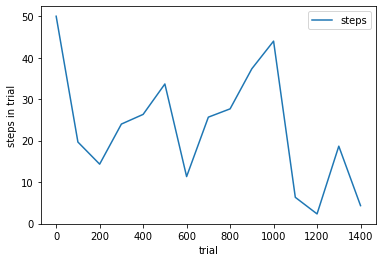

In [10]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


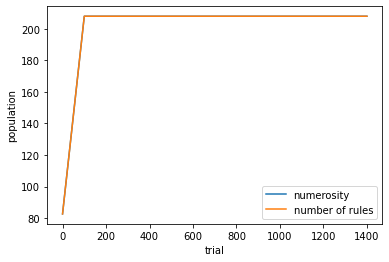

In [11]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.